In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"Datasets\2024.csv")
df=df.drop(['Season'], axis=1)
df.dropna(inplace=True)
df.head()

,StateName,DistrictName,BlockName,Sector,Category,Crop,QueryType,QueryText,KccAns,CreatedOn,year,month
0,GUJARAT,NAVSARI,VANSDA,AGRICULTURE,Others,Others,Government Schemes,ask about saptaparni growth and fungus attack,પાકમાં ફૂગ સામે રક્ષણ આપવા માટે કાર્બેંડાઝીમ ...,2024-05-03T09:57:59.867,2024,5
1,GUJARAT,NAVSARI,CHIKHALI,AGRICULTURE,Others,Others,Government Schemes,ask about general information\t,કિસાન કોલ સેન્ટરમાં કોલ કરવા બદલ ધન્યવાદ.,2024-05-06T09:45:17.727,2024,5
2,GUJARAT,NAVSARI,NAVSARI,HORTICULTURE,Vegetables,Brinjal,Cultural Practices,Ask about growth problem in vegetables crop\t,શાકભાજી પાકમાં છોડની વૃદ્ધિ અને વિકાસ માટે હ્ય...,2024-05-13T10:48:08.6,2024,5
3,GUJARAT,NAVSARI,0,AGRICULTURE,Others,Others,Government Schemes,AIF Information Related Out bound call\t,--આપનો કીમતી અભિપ્રાય આપવા બદલ ધન્યવાદ.,2024-05-14T16:14:59.52,2024,5
4,GUJARAT,NAVSARI,0,AGRICULTURE,Others,Others,Government Schemes,AIF Information Related Out bound call\t,--આપનો કીમતી અભિપ્રાય આપવા બદલ ધન્યવાદ.,2024-05-14T16:50:01.057,2024,5


In [3]:
df.isnull().sum()

StateName       0
DistrictName    0
BlockName       0
Sector          0
Category        0
Crop            0
QueryType       0
QueryText       0
KccAns          0
CreatedOn       0
year            0
month           0
dtype: int64

In [4]:
df = df.drop(["year", "month"], axis=1)
df.head(3)

,StateName,DistrictName,BlockName,Sector,Category,Crop,QueryType,QueryText,KccAns,CreatedOn
0,GUJARAT,NAVSARI,VANSDA,AGRICULTURE,Others,Others,Government Schemes,ask about saptaparni growth and fungus attack,પાકમાં ફૂગ સામે રક્ષણ આપવા માટે કાર્બેંડાઝીમ ...,2024-05-03T09:57:59.867
1,GUJARAT,NAVSARI,CHIKHALI,AGRICULTURE,Others,Others,Government Schemes,ask about general information\t,કિસાન કોલ સેન્ટરમાં કોલ કરવા બદલ ધન્યવાદ.,2024-05-06T09:45:17.727
2,GUJARAT,NAVSARI,NAVSARI,HORTICULTURE,Vegetables,Brinjal,Cultural Practices,Ask about growth problem in vegetables crop\t,શાકભાજી પાકમાં છોડની વૃદ્ધિ અને વિકાસ માટે હ્ય...,2024-05-13T10:48:08.6


In [5]:
cols = [col for col in df.columns if col not in ["KccAns", "CreatedOn"]]
cols

['StateName',
 'DistrictName',
 'BlockName',
 'Sector',
 'Category',
 'Crop',
 'QueryType',
 'QueryText']

## Data Cleaning: Lowercasing, Handling Punctuation, and Removing Unnecessary Characters

In this step, we preprocess the text data to ensure consistency and improve data quality. The following actions are performed on the relevant columns:

- **Lowercasing:** Convert all text to lowercase to avoid case-sensitive mismatches.
- **Handling Punctuation & Unnecessary Characters:** Remove or replace punctuation marks and special characters that do not add value to the analysis.

These cleaning steps help standardize the data and prepare it for further analysis or modeling.

In [6]:
from string import punctuation

def lower_case(x):
    return x.lower()

def handle_punct(x):
    return x.translate(str.maketrans("", "", punctuation))

def handle_punct_guj(x):
    return x.translate(str.maketrans("", "", punctuation.translate(str.maketrans("", "", ",/+%"))))

for col in cols:
    df[col] = df[col].apply(lower_case)
    df[col] = df[col].apply(lambda x: handle_punct(x))
    
df['KccAns']=df['KccAns'].apply(lambda x: handle_punct_guj(x))
df=df.drop_duplicates(subset=cols, keep='first')
df.head(3)

,StateName,DistrictName,BlockName,Sector,Category,Crop,QueryType,QueryText,KccAns,CreatedOn
0,gujarat,navsari,vansda,agriculture,others,others,government schemes,ask about saptaparni growth and fungus attack,પાકમાં ફૂગ સામે રક્ષણ આપવા માટે કાર્બેંડાઝીમ ...,2024-05-03T09:57:59.867
1,gujarat,navsari,chikhali,agriculture,others,others,government schemes,ask about general information\t,કિસાન કોલ સેન્ટરમાં કોલ કરવા બદલ ધન્યવાદ,2024-05-06T09:45:17.727
2,gujarat,navsari,navsari,horticulture,vegetables,brinjal,cultural practices,ask about growth problem in vegetables crop\t,શાકભાજી પાકમાં છોડની વૃદ્ધિ અને વિકાસ માટે હ્ય...,2024-05-13T10:48:08.6


Here i am not Removing the State Name instead of doing this for Gujarat for scope of this Assignment so this can directly be scaled by replacing the actual data file  directly

In [8]:
df.loc[1]

StateName                                        gujarat
DistrictName                                     navsari
BlockName                                       chikhali
Sector                                       agriculture
Category                                          others
Crop                                              others
QueryType                             government schemes
QueryText                ask about general information\t
KccAns          કિસાન કોલ સેન્ટરમાં કોલ કરવા બદલ ધન્યવાદ
CreatedOn                        2024-05-06T09:45:17.727
Name: 1, dtype: object

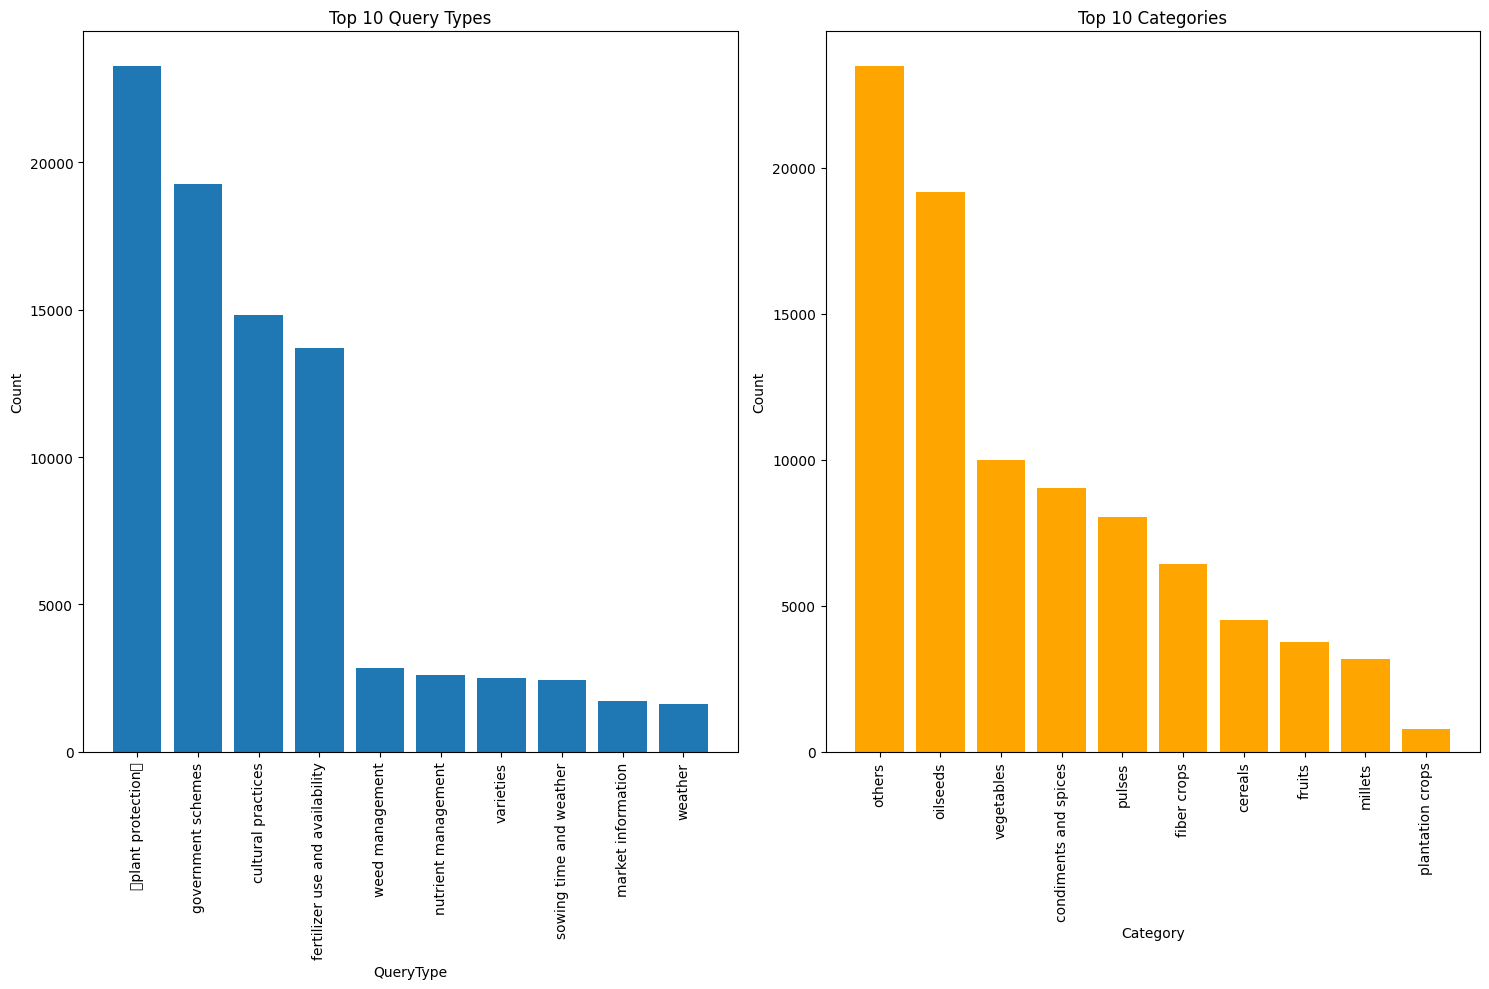

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Mostly Occured Query Types
top_10_qt = df['QueryType'].value_counts().head(10)
axes[0].bar(top_10_qt.index, top_10_qt.values)
axes[0].set_title('Top 10 Query Types')
axes[0].set_xlabel('QueryType')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(top_10_qt.index, rotation=90)

# Mostly Occured Categories
top_10_cat = df['Category'].value_counts().head(10)
axes[1].bar(top_10_cat.index, top_10_cat.values,color='orange')
axes[1].set_title('Top 10 Categories')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(top_10_cat.index, rotation=90)

plt.tight_layout()
plt.show()

### JSON Conversion for Structured Query Data

To facilitate downstream tasks, each row of the dataframe is converted into a structured JSON-like dictionary. This format organizes the query, answer, and relevant metadata (such as geolocation and crop information) in a nested structure for easy access and processing.

**Example Output:**

```json
{
    "QueryText": " ",
    "KccAns": " ",
    "metadata": {
        "geolocation": {
            "StateName": "",
            "DistrictName": "",
            "BlockName": ""
        },
        "Crop_info": {
            "Sector": "",
            "Category": "",
            "Crop": "",
            "QueryType": ""
        },
        "CreatedOn": ""
    }
}
```

This structure ensures that all relevant information for each query is encapsulated in a single, easily accessible object.

In [10]:
def generate_json(x):
    data = dict()
    data["QueryText"] = x["QueryText"]
    data["KccAns"] = x["KccAns"]
    data["metadata"] = dict()
    data["metadata"]["geolocation"] = {
        "StateName": x["StateName"],
        "DistrictName": x["DistrictName"],
        "BlockName": x["BlockName"],
    }
    data["metadata"]["Crop_info"] = {
        "Sector": x["Sector"],
        "Category": x["Category"],
        "Crop": x["Crop"],
        "QueryType": x["QueryType"],
    }
    data["metadata"]["CreatedOn"] = x["CreatedOn"]
    return data


json_df = df.apply(lambda x: generate_json(x), axis=1).to_frame('json_data')
json_df.head(3)

,json_data
0,{'QueryText': 'ask about saptaparni growth and...
1,{'QueryText': 'ask about general information '...
2,{'QueryText': 'ask about growth problem in veg...


In [11]:
import json

with open("preprocessed-2024.json", "w", encoding="utf-8") as f:
    json.dump(json_df["json_data"].tolist(), f, ensure_ascii=False, indent=2)